In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

<div dir='rtl'>
    از توابع زیر برای خواندن و ذخیره کردن تصاویر سیاه سفید استفاده می‌شود.
</div>

In [2]:
def read_gray_img(path):
    img = Image.open(path).convert('L')
    return np.array(img, dtype=np.uint8)

def save_gray_img(img, path):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.savefig(path, dpi=600)

<div dir='rtl'>
    تابع کانولوشن 2 بعدی را در زیر تکمیل کنید. پیاده سازی باید توسط خودتان انجام شده باشد و استفاده از توابع آماده مجاز نیست. برای سادگی میتوانید فرض کنید اندازه هسته (kernel) همیشه 3 در 3 است و تصویر ورودی سیاه سفید می‌باشد. همچنین به تصویر داده شده باید zero padding اضافه کنید تا تصویر خروجی اندازه برابر با تصویر ورودی پیدا کند. ورودی‌ها و خروجی تابع آرایه دو بعدی numpy هستند.
</div>

In [3]:
def convolution2d(image, kernel):
    img_n,img_m = image.shape
    krn_n,krn_m = kernel.shape
    N ,M=img_n+krn_n-1,img_m+krn_m-1
    result = np.zeros((N,M))
    padded_image = np.pad(image, ((krn_n-1, krn_n-1),(krn_m-1, krn_m-1)), 'constant', constant_values=(0, 0))
    for i in range(N):
        for j in range(M):
            result[i][j] = np.sum(np.multiply(kernel,padded_image[i:i+krn_n,j:j+krn_m]))
    result = result[int((krn_n-1)/2):N-int((krn_n-1)/2),int((krn_m-1)/2):M-int((krn_m-1)/2)]
    return result

<div dir='rtl'>
    در سلول زیر تصویر مورد نظر بارگذاری شده و هسته‌های مختلف برای کانولوشن تعریف شده است.
</div>

In [4]:
image = read_gray_img('./gray.png')

kernel1 = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
], dtype=float)

kernel2 = 1/9 * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], dtype=float)

kernel3 = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
], dtype=float)

kernel4 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
], dtype=float)

kernel5 = 1/2 * np.array([
    [0, 0, 1],
    [0, 0, 0],
    [1, 0, 0]
], dtype=float)

<div dir='rtl'>
    با تکمیل تابع کانولوشن در بالا، کد زیر باید به درستی عمل کانولوشن را برای هر هسته انجام داده و تصاویر حاصل را در فایل‌های مختلف ذخیره کند.
</div>

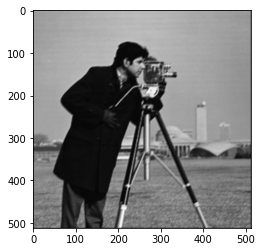

In [5]:
for i, kernel in enumerate([kernel1, kernel2, kernel3, kernel4, kernel5]):
    conv = convolution2d(image, kernel)
    save_gray_img(conv, str(i+1) + ".png")

<div dir='rtl'>
    سلول زیر نیز دو مرحله عمل کانولوشن را روی تصویر اصلی اعمال و ذخیره می‌کند.
</div>

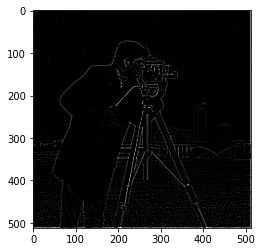

In [6]:
conv = convolution2d(image, kernel2)
conv = convolution2d(conv, kernel4)
save_gray_img(conv, "6.png")

<div dir='rtl'>
    در سلول پایین برای هر تصویر به دست آمده در مراحل بالا تشریح کنید که چه اتفاقی افتاده است و فیلترها (هسته‌ها)ی کانولوشن چه عملی روی تصویر انجام می‌دهند. پاسخ‌تان را توجیه کنید.
</div>

<div dir="rtl">
        <font face="IranNastaliq" size=6>
بررسی تابع convolution2d  
        </font>
</div>
$$ y\left[i,j\right]=\sum_{m=-\infty}^\infty\sum_{n=-\infty}^\infty h\left[m,n\right] \cdot x\left[i-m,j-n\right] $$
<div dir="rtl">
    <br>
        <font face="IranNastaliq" size=4>
رابطه بالا رابطه برای کانولشن دو بعدی خواهد بود همچنین دقت کنید که مقادیر منفی معنی دارند زیرا مرکز یا همان نقطه صفر و صفر در مرکز تصاویر قرار دارد.
             <br> <br>
        </font>
</div>


<div dir="rtl">
        <font face="IranNastaliq" size=6>
بررسی kernel  های ۱ تا ۵ و kernel  ترکیبی آخر  
        </font>
</div>
<div dir="rtl">
    <br>
        <font face="IranNastaliq" size=4>
دقت کنید که اگر ابعاد تصویر ورودی m*n و ابعاد kernel اعمالی p*q باشد ابعاد نهایی تصویر بدست آمده برابر : 
          (m+q-1)*(n+p-1)    خواهد بود. منتها چون گفته شده که اندازه تصویر حفظ شود آنرا به صورت زیر به اندازه اصلی بر می‌گردانیم.
            <br> <br>
            <div dir = "ltr">
            result[int((krn_n-1)/2):N-int((krn_n-1)/2),int((krn_m-1)/2):M-int((krn_m-1)/2)] 
            </div>
            <br> <br>
            همچنین تو تابع کمکی برای تشریح توضیحات داده شده است یکی آنکه اختلاف یا همان error دو تصویر به هم را محاسبه می‌کند (با کمک norm2 و دیگری نمایش تصویر کانوالو شده و تصویر اصلی در کنار هم برای مقایسه است.
            محسابه ارور به صورت زیر است .
        </font>
</div>
$$ e = norm2(origin - conv) / m*n$$
<div dir="rtl">
    <br>
        <font face="IranNastaliq" size=5>
دقت کنید که پیکسل های کنار هم مقادیر نزدیک به هم نیز دارند (مگر در لبه اشیا تصویر) که این نکته در بررسی کرنل ها استفاده می‌شود.
        </font>
</div>

In [7]:
# helper
def calculate_e(original_image,image2):
    n1,m1 = original_image.shape
    return np.linalg.norm(original_image -image2) * 1/(n1*m1)
def compare_images(origin_image,image,title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(title)
    fig.set_size_inches(18, 10)
    ax1.imshow(origin_image, cmap='gray', vmin=0, vmax=255)
    ax1.set_title("origin")
    ax2.imshow(image, cmap='gray', vmin=0, vmax=255)
    ax2.set_title("convolved_image")

<div dir="rtl">
        <font face="IranNastaliq" size=6>
بررسی kernel  اول
(identity)
</font>
</div>
$$
\begin{bmatrix}
0&0&0\\
0&1&0\\
0&0&0
\end{bmatrix}
\\
$$
$$sum(kernel) = 1$$
<div dir="rtl">
    <br>
        <font face="IranNastaliq" size=3>
            همانطور که می‌بینید کرنل تنها در نقطه مرکز (x = 0 , y = 0)  یک است وبقیه جاها صفر است که همان سیگنال delta dirac در دو بعد و به صورت گسسته است  از طرفی دقت کنید سیستم ما خطی است زیرا میتوانیم هر عملیات convolve کردن با یک kernel را با ضرب 2 ماتریس جایگزین کنیم.  بنابراین داریم :
            <br>
            بنابراین تصویر پس از کانوالو همان تصویر اصلی است(البته سایز متفاوت اما در پیکسل های متفاوت مقدار آنها 
           صفر است.)
            .بنابراین همانطور که مشاهده می‌کنید مقدار تفاوت صفر است و همچنین دو تصویر یکسان اند.
       </font>
</div>
$$ image(x,y)*\delta(x,y) = image(x,y) $$

kernel(3*3) 1 explanation
calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is :  0.0


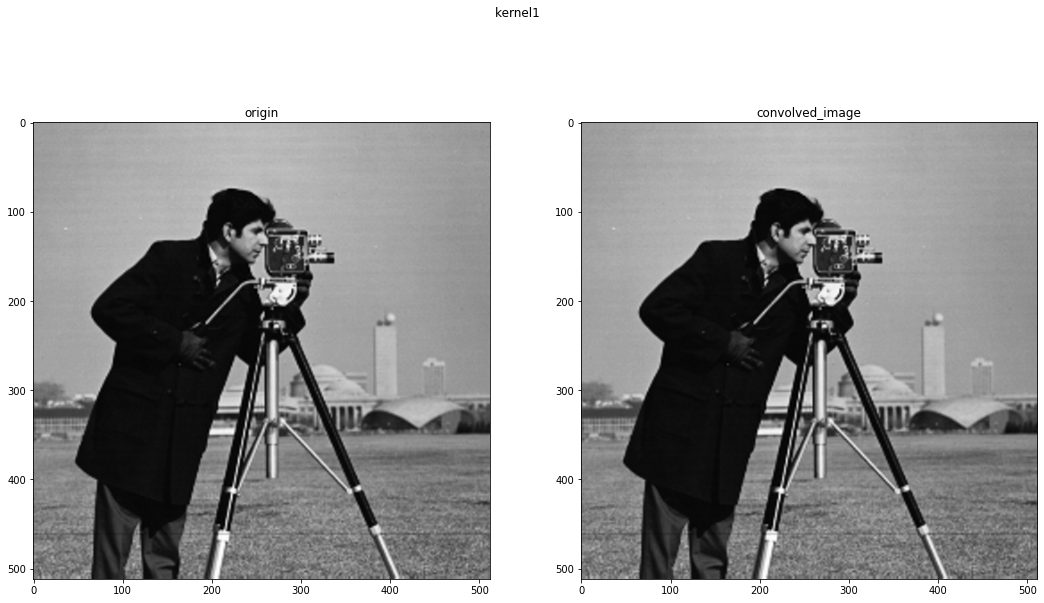

In [8]:
print("kernel(3*3) 1 explanation")
conv = convolution2d(image,kernel1)
e = calculate_e(image,conv)
print("calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is : ",np.round(e,8))
compare_images(image,conv,"kernel1 ")

<div dir="rtl">
        <font face="IranNastaliq" size=6>
بررسی kernel دوم
        (blur box)
        </font>
</div>
$$
\frac{1}{9} \times \begin{bmatrix}
1&1&1\\
1&1&1\\
1&1&1
\end{bmatrix}
\\
$$
$$sum(kernel) = 1$$
<div dir="rtl">
    <br>
        <font face="IranNastaliq" size=3>
            همانطور که گفته شد مقادیر اطراف پیکس ها با هم مقادیر نزدیک اند بجز در لبه ها از طرفی کرنل این قسمت دارای درایه های یکسان و جمع ۱ است بنابراین دارد یک میانگین گیری بدون وزن روی پیکسل های اطراف یک پیکسل انجام می‌دهد و مقدار میانگین را جایگزین آن می‌کند بنابراین تصویر مقداری blur می‌شود و این blurring در لبه ها بیشتر است اما چون ماتریس کرنل ۳ در ۳ است مقدار blur خیلی زیاد نیست و مقدار خطا نیز مقدار زیادی نیست در ادامه این کرنل را به کرنل ها با ابعاد بیشتر توسعه می‌دهیم تا بررسی دقیق تری از این کرنل داشته باشیم.
            <br>
            همانطور که بینید مقدار خطا مقدار ۰.۰۱۴۴۲ است که مقدار زیادی نیست.
            <br>
            دقت کنید که همانطور که گفتیم کرنل درواقع برای هر پیکسل میانگین پیکسل های اطراف را نیز در نظر میگیرد در واقع با یک توزیع آماری یکنواخت به بازه ۳ این میانگین گیری را انجام می‌دهد این بازه می‌تواند بزرگتر شود و مقدار خطا نیز افزایش می‌یابد
       </font>
</div>

kernel 3 explanation 3*3
calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is :  0.01188069


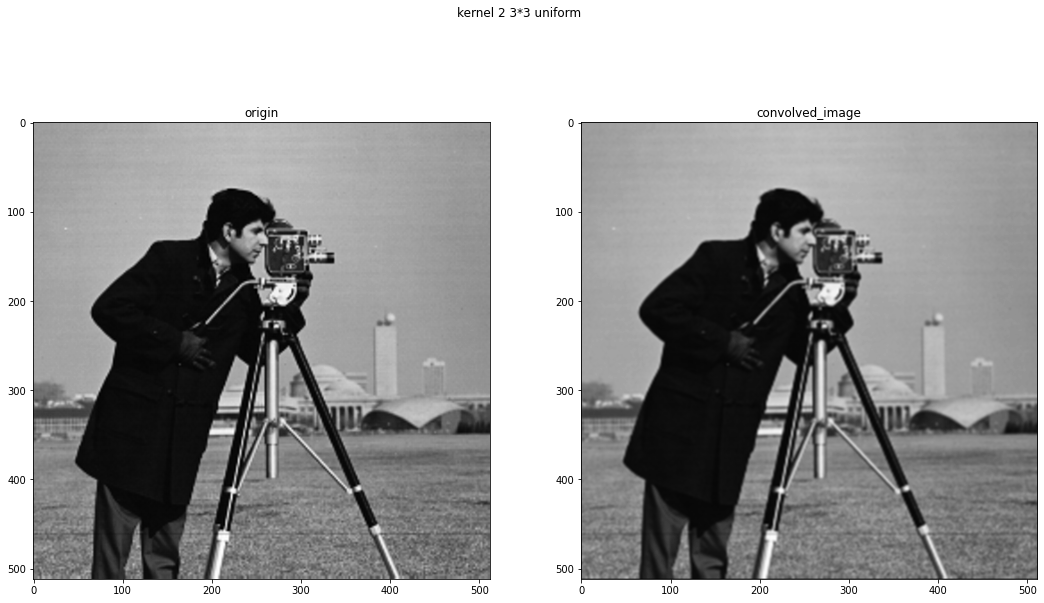

In [9]:
print("kernel 3 explanation 3*3")
conv = convolution2d(image,kernel2)
e = calculate_e(image,conv)
print("calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is : ",np.round(e,8))
compare_images(image,conv,"kernel 2 3*3 uniform")

<div dir="rtl">
        <font face="IranNastaliq" size=5>
بررسی کرنل دوم با ابعاد متفاوت  (میانگین گیری بی وزن یا همان وزن دار با توزیع یکنواحت و همچنین یک کرنل گوسی برای حالت بهتر  ) برای درک بهتر کرنل
        </font>
</div>

$$\\ \begin{bmatrix}
uniform(n,n)
\end{bmatrix}
\\
$$
$$ \begin{bmatrix}
gussian(n,n)
\end{bmatrix}
\\
$$
$$sum(kernel) = 1$$
<div dir="rtl">
    <br>
        <font face="IranNastaliq" size=3>
            همانطور که گفته شد مقادیر اطراف پیکس ها با هم مقادیر نزدیک اند بجز در لبه ها.
       </font>
</div>

kernel 2 explanation - extension 7*7
calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is :  0.02821661
kernel 2 explanation - extension 15*15
calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is :  0.05108778


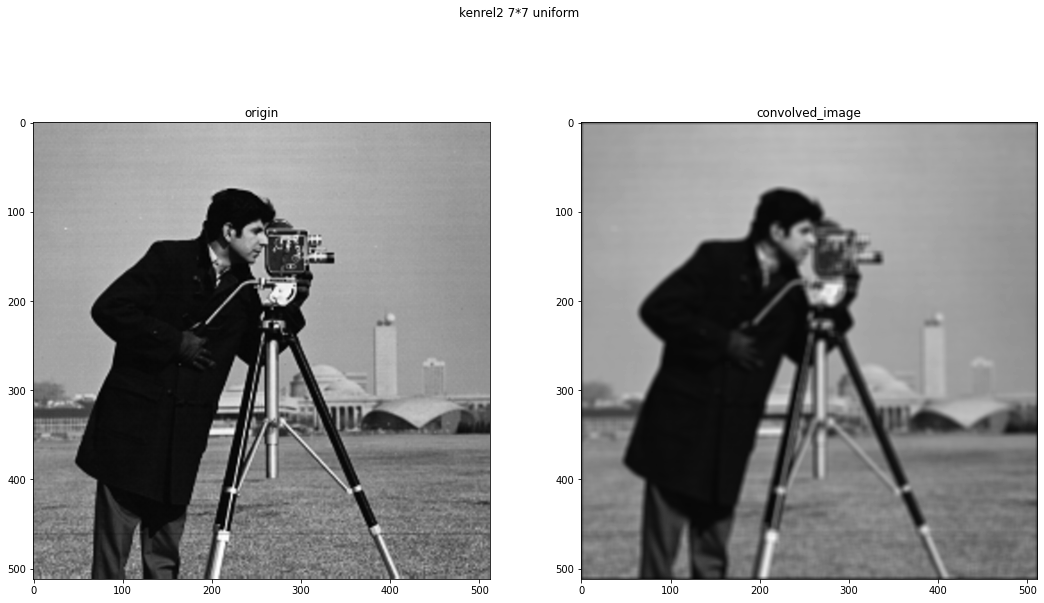

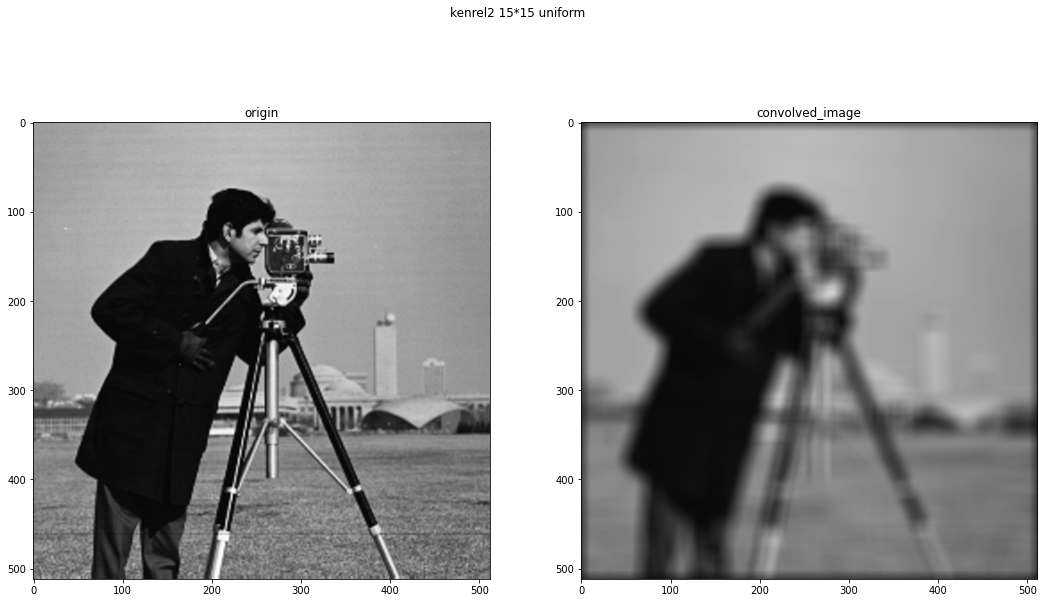

In [10]:
print("kernel 2 explanation - extension 7*7")
conv = convolution2d(image,1/(7*7) * np.ones((7,7)))
e = calculate_e(image,conv)
print("calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is : ",np.round(e,8))
compare_images(image,conv,"kenrel2 7*7 uniform")
print("kernel 2 explanation - extension 15*15")
conv = convolution2d(image,1/(21*21) * np.ones((21,21)))
e = calculate_e(image,conv)
print("calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is : ",np.round(e,8))
compare_images(image,conv,"kenrel2 15*15 uniform ")

<div dir="rtl">
    <br>
        <font face="IranNastaliq" size=3>
همانطور که می‌بینید میزان blur تصاویر با افزایش سایز کرنل افزایش یافته است و همچنین میزان ارور نیز افزایش می‌یابد 
            <br>
            زیرا برای تشکیل هر پیکسل مقدار پیکسل های بیشتری از اطراف پیکسل در تشکیل پیکسل جدید مشارکت میکنن.
            <br>
            حال کرنل گوسی زیر را در نظر بگیرید.
       </font>
    
</div>
    <div>
        \begin{align*}
        \frac{1}{16} \times
        \begin{bmatrix}
            1&2&1\\
            2&4&2\\
            1&2&1\\
        \end{bmatrix}
        \end{align*}
    </div>

kernel 2 explanation - extension 3*3
calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is :  0.00899055


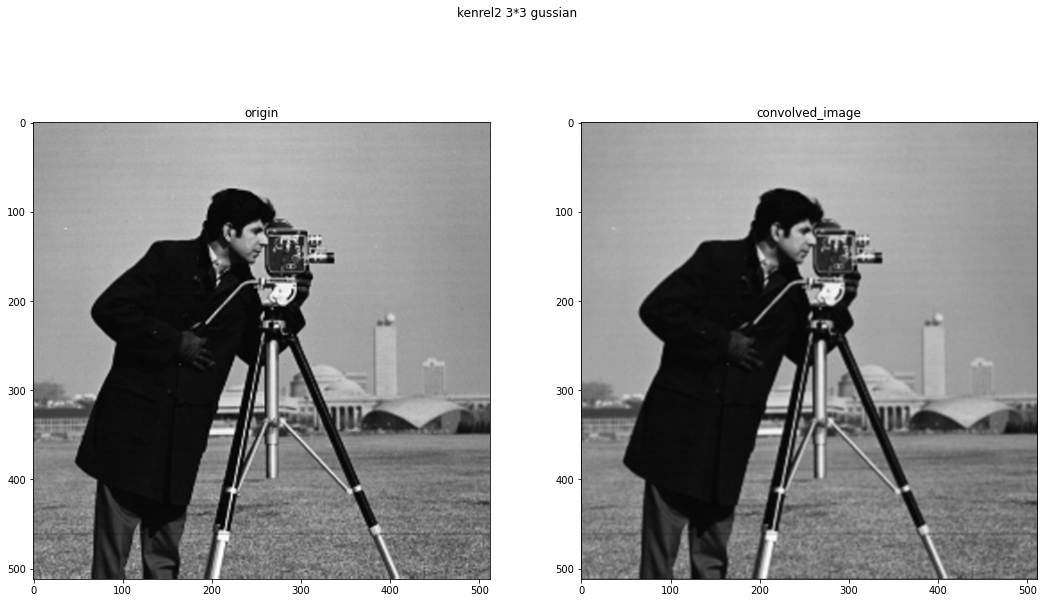

In [11]:
print("kernel 2 explanation - extension 3*3")
kernel = 1/16 *np.array([[1,2,1],[2,4,2],[1,2,1]])
conv = convolution2d(image,kernel)
e = calculate_e(image,conv)
print("calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is : ",np.round(e,8))
compare_images(image,conv,"kenrel2 3*3 gussian ")

<div dir="rtl">
    <br>
        <font face="IranNastaliq" size=3>
همانطور که مشاهده می‌کنید مقدار خطا از ۰.۰۱۴ به ۰.۰۰۸ کاهش یافته است زیرا کرنل گوسی به مرکز وزن بیشتری می‌دهد و میزان blur تصویر کمتر است.
       </font>
    
</div>

<div dir="rtl">
        <font face="IranNastaliq" size=6>
بررسی kernel سوم
       (sharpen)
       </font>
</div>
$$
\begin{bmatrix}
-1&-1&-1\\
-1&9&-1\\
-1&-1&-1
\end{bmatrix}
\\
$$
$$sum(kernel) = 1$$
$$pixel = 9*pixcel - sum(surroundings)$$
<div dir="rtl">
    <br>
        <font face="IranNastaliq" size=3>
            برای بررسی این کرنل باید چندین حالت را برررسی کنیم :
            <ul>
                <li>
            پیکسل های اطراف پیکسل مرکزی اخلاف زیادی با اندازه پیکسل مرکزی نداشته باشند-> در این حالت عبارت جایگزین نزدیک همان مقدار پیکسل اصلی است. 
            <li>
            پیکسل مرکزی روشن تر از پیکسل های اطراف باشد ->در این حالت مقدار پیکسل جایگزین مقداری بیشتر از قبل می‌شود(مطابق فرمول)‌و پیکسل روشن تر می‌شود بنابراین نقاط روشن عکس روشن تر می‌شوند به عبارتی نقاطی که نسبت به اطراف روشن تر هستند میزان روشنی اشان افزایش می‌یابد.
            <li>
            پیکسل مرکزی تیره تر از پیکسل های اطراف باشد در این حالت مقدار پیکسل جایگزین کمتر از قبل می‌شود بنابراین پیکسل جایگزین تیره تر می‌شود.
            <li>
            نقاط مرزی-> در نقاط مرزی چون تفاوت رنگ زیاد است بنابراین این کرنل دو طرف نقاط مرزی را متمایز تر می‌کند.
            <br>
        بنابراین کرنل شماره سوم نقاط تیره را تیره تر و نقاط روشن را روشن تر می‌کند ونقاط مرزی را مشخص تر می‌کند بنابراین این کرنل تصویر را تیز می‌کند.
            <br>
            همچنین این کرنل در نقاط مرزی دوطرف نقاط مرزی را غلظت رنگشان را بیشتر می‌کند (در اینجا غلظت منظورمان نسبی است اگر از اطراف روشن تر آنرا روشن تر و اگر از اطراف تیره تر آنرا تیره تر می‌کند.)
                 در لبه‌ها که یک سمت روشن و سمت دیگر سیاه است این لبه‌های بیشتر به چشم می‌ایند. که کاربرد آن Edge detection است.
      </font>
</div>

kernel 3 explanation 3*3
calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is :  0.10692618


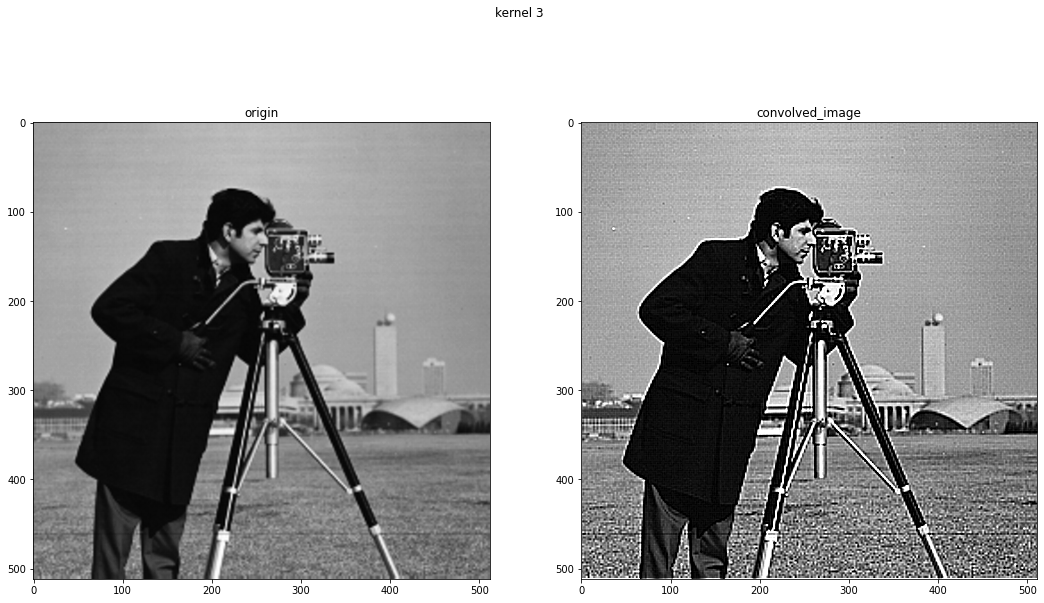

In [12]:
print("kernel 3 explanation 3*3")
conv = convolution2d(image,kernel3)
e = calculate_e(image,conv)
print("calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is : ",np.round(e,8))
compare_images(image,conv,"kernel 3")

<div dir="rtl">
    <br>
        <font face="IranNastaliq" size=3>
       همانطور که می‌بینید نقاط مرزی تیز تر شده اند و همچنین نقاطی که سفید بوند و اطرافشان تیره تر سفید تر و نقاطی که نسبت به اطرافشان تیره تر بوده اند تیره تر گشته اند. به عنوان مثال به مرز شخص در تصویر دقت کنید نقاط پالتو سیاه وی سیاه تر شده اند (‌یا سیاه باقی مانده اند زیرا صفر کمتر نمی‌شود.) ولی نقاط آسمان اطراف پالتو را اگر ببینید در حد مشترک مرز با پالتو بسیار سفید شده اند زیرا نسبت به رنگ سیاه پالتو سفید تر بوده اند و این سفیدی افزایش یافته است .)
       </font>
</div>

<div dir="rtl">
        <font face="IranNastaliq" size=6>
بررسی kernel چهارم
        (egde detection)
        </font>
</div>
$$
\begin{bmatrix}
-1&-1&-1\\
-1&8&-1\\
-1&-1&-1
\end{bmatrix}
\\
$$
$$sum(kernel) = 0$$
$$pixel = 8*pixcel - sum(surroundings)$$
<div dir="rtl">
    <br>
        <font face="IranNastaliq" size=3>
          دقت کنید که در این کرنل مجموع درایه های کرنل برابر صفر است بنابراین داریم: 
            <br>
            دقت کنید که در اینجا اگر پیکسل های اطراف اعدادی نزدیک به هم باشند  مقدار پیکسل جایگزین به مقدار صفر نزدیک است بنابراین این کرنل نقاطی که اختلاف عددی زیادی ندارند و کنار هم هستند را سیاه می‌کند بنابراین اشیا سیاه می‌شوند(زیرا اکثر اشیا میزان تغیر مقدار پیکسل های کناری بسیار کم است.
            <br>
            اما نکته مهم در مرز ها و نقاطی است که اختلاف عددی زیاد است مانند edge  ها این اختلاف عددی باعث می‌شود که 
            یک مقدار مثبت تولید شود و مرز ها مشخص شوند 
     <br>
            دقت کنید که این کرنل مجموع ۸ پیکسل اطراف پیکسل مرکزی را ا از ۸ برابر آن کم می‌کند بنابراین در نقاطی که پیکسل های داخل اشیا است نقاط سیاه می‌شوند و در مرز ها که اختلاف زیاد داریم مقادیر مثبت می‌شوند و سفید می‌شود (توضیحات زیر تصویر ) همچنین دقت کنید که میزان تفاوت رنگ
            دو object مانند آسمان و گنبد یا مانند دسته دوربین و کت فرد با میزان مرز مشخص شده ارتباط دارد بدین صورت که چون دسته سفید و کت سیاه است در مرز اختلاف مقادیر زیاد است و مرز به خوبی مشخص است اما در گنبد و اسمان مقدار اختلاف رنگ و به تبع آن اختلاف مقدار پیکسل ها زیاد نیست و این امر سبب می‌شود که مرز به وضوح مرز دست هدوربین با کت مشخص نشود .
            <br>
            با توجه به توضیحات بالا کرنل کار edge detection انجام می‌دهد و در محل هایی که اختلاف رنگ دو شی در تصویر زیاد است مرز واضح و در جاهایی که اختلاف رنگ دو شی زیاد نیست این مرز از وضوح کمتری برخوردار است.
     </font>
</div>

kernel 4 explanation 3*3
calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is :  0.26705168


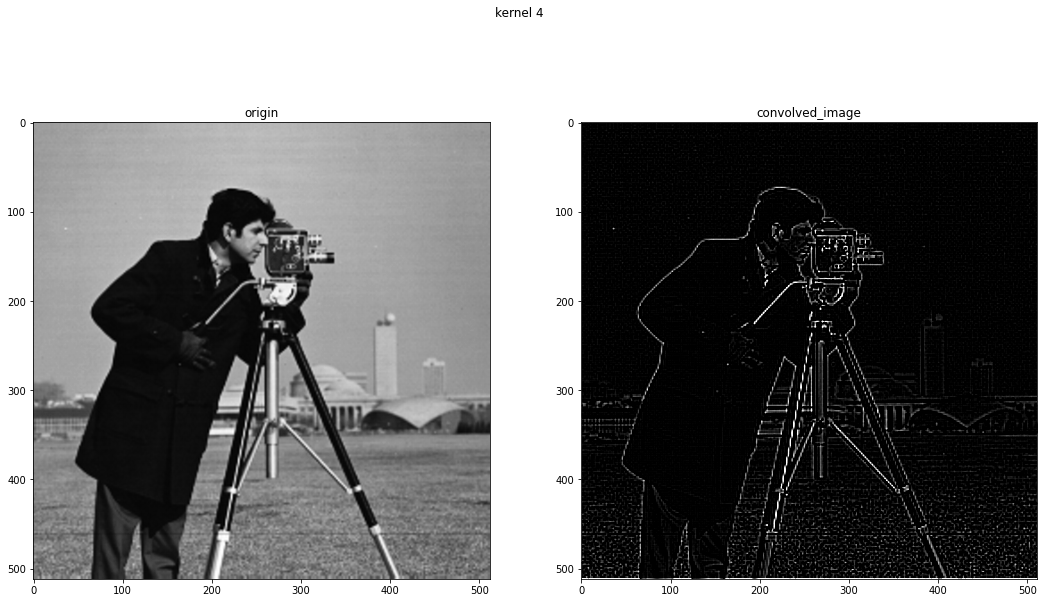

In [13]:
print("kernel 4 explanation 3*3")
conv = convolution2d(image,kernel4)
e = calculate_e(image,conv)
print("calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is : ",np.round(e,8))
compare_images(image,conv,"kernel 4")

<div dir="rtl">
    <br>
        <font face="IranNastaliq" size=3>
همانطور که از تصویر مشخص است داخل اشیا به طور کلی سیاه شده ات و همچنین مرز کت فرد با دسته و آسمان به خوبی مشخص است زیرا اختلاف رنگ زیاد است اما مرز گنبد یا ساختمان پشت با اسمان آنچنان واضح نیست زیرا اختلاف رنگ دو شی در تصویر زیاد نیست.
            اما مرز دوربین با اسمان و چمن ها به خوبی واضح است.
     </font>
</div>

<div dir="rtl">
        <font face="IranNastaliq" size=6>
بررسی kernel پنچم
        (motion blur)
        </font>
</div>
$$ \frac{1}{2} \times
\begin{bmatrix}
0&0&1\\
0&0&0\\
1&0&0
\end{bmatrix}
\\
$$
$$sum(kernel) = 1$$
$$result = \frac{1}{2} ((\delta(x-1,y-1)+\delta(x+1,y+1))*image(x,y))$$
$$result =\frac{1}{2} (image(x,y)*\delta(x+1,y+1) + image(x,y)*\delta(x-1,y-1)) $$
$$result =\frac{1}{2} (image(x-1,y-1)+image(x+1,y+1)) $$
<div dir="rtl">
    <br>
        <font face="IranNastaliq" size=3>
            همانطور که در محاسبات بالا مشاهده می‌کنید حاصل convolve کرنل با تصویر انتقال تصویر به بالا و راست و انتقال 
              تصویر به پایین و چپ و جمع کردن دو تصویر حاصل و میانگین گیری است این کار باعث می‌شود که تصویر بدست آمده اندکی مات شود مانند زمانی که با دوربین عکاسی درحال حرکت عکس میگیریم و این سبب می‌شود که تصویر اندکی مات شود.(motion)  
     </font>
</div>

kernel 5 explanation 3*3
calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is :  0.01861774


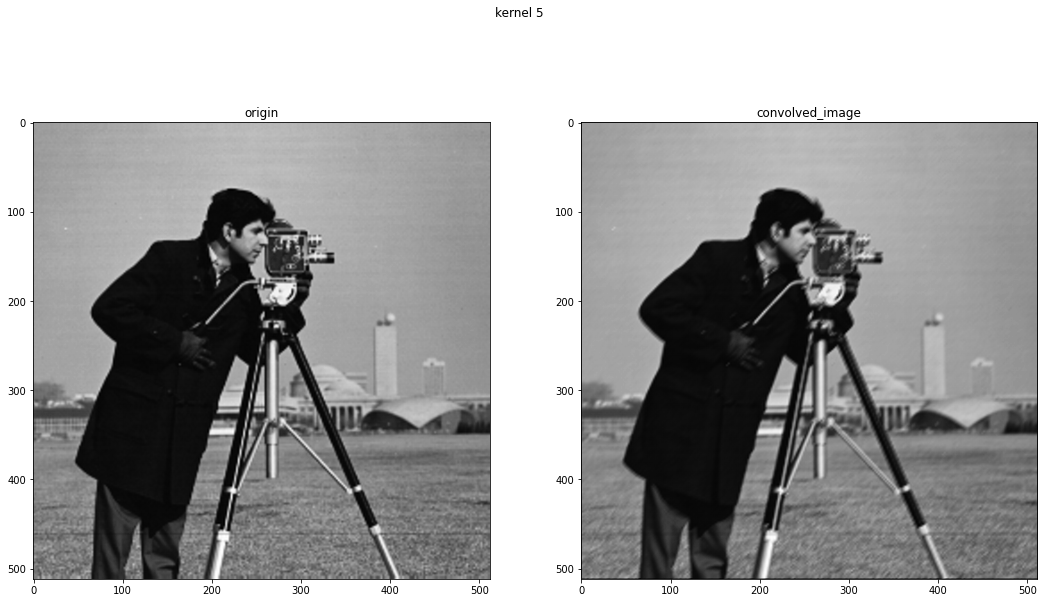

In [14]:
print("kernel 5 explanation 3*3")
conv = convolution2d(image,kernel5)
e = calculate_e(image,conv)
print("calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is : ",np.round(e,8))
compare_images(image,conv,"kernel 5")

<div dir="rtl">
    <br>
        <font face="IranNastaliq" size=3>
همانطور که مشاهده می‌:کنید تصویر اندکی مات شده است.  
     </font>
</div>

<div dir="rtl">
        <font face="IranNastaliq" size=6>
بررسی kernel ترکیبی
        </font>
</div>
<div dir="rtl">
    <br>
        <font face="IranNastaliq" size=3>
در این بخش حاصل کانوالو تصویر با دو کرنل انجام میشود:
     </font>
</div>
$$result = (image*kernel2)*kernel4$$
<div dir="rtl">
        <font face="IranNastaliq" size=3>
با توجه به توضیحات بالا کرنل دوم تصویر را blur می کند و کرنل 4 ام edge ها را تشخیص می‌دهد حال به بررسی ترکیب این دو کرنل می‌پردازیم :
 <br>
            کرنل اول تصوری را بلور می‌کند بدان معنا که آن edge هایی که اختلاف رنگ دو طرفشان کم است و تفاوت رنگی آنچنانی ندارند در طی کانولوشن با کرنل اول این اختلاف رنگ کمتر هم می‌شود در واقع مرز ها از تمایز کمتری برخوردار می‌شوند و سپس کرنل چهارم مرز هارا تعیین می‌کند و چون مرز های اشیایی که به هم از نظر رنگی نزدیک بودند از اهمیت کمتری برخوردار شده است ( طی فرایند کرنل دوم) این اتفاق سبب می‌شود که تنها edge هایی که در تصویر اصلی مرز های بسیار متمایزی را تشکیل می ‌دهند تشخیص داده شوند مانند دوربین و چمن ها و یا کت فرد و آسمان اما لبه های اشیایی نظیر گنبد محو می‌شوند زیرا طی فرایند blur کرنل دوم مرز ها دستخوش تغییر شده و کرنل ۴ ام آنهارا تشخیص نمی‌دهد.
        </font>
</div>

multi layer conv explanation 3*3
calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is :  0.25603095


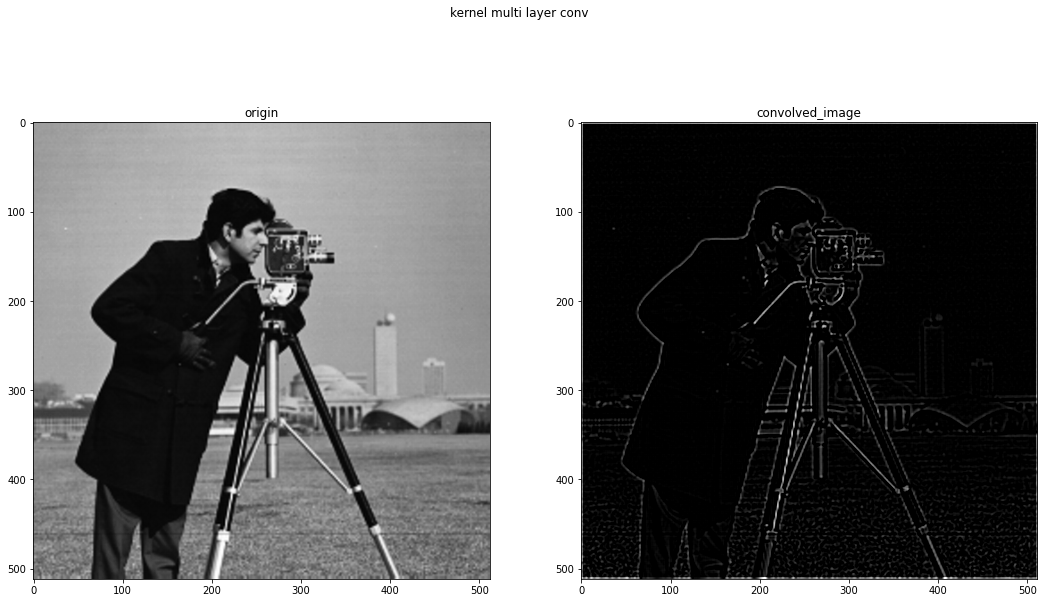

In [15]:
conv = convolution2d(image, kernel2)
conv = convolution2d(conv, kernel4)
print("multi layer conv explanation 3*3")
e = calculate_e(image,conv)
print("calculated error besed on norm2/(n*m 0f original picture) of difference matrix of two image is : ",np.round(e,8))
compare_images(image,conv,"kernel multi layer conv")

<div dir="rtl">
        <font face="IranNastaliq" size=3>
همانطور که بیان شد تنها مرز ها و لبه هایی که دو طرف لبه اختلاف رنگ و مقدار زیادی دارند تشخیص داده می‌شوند مانند دوربین و فرد اما گنبد و اشیا عقب تر که اختلاف رنگ زیادی ندارند محو می ‌شوند و edge هایشان وضوح 
           چندانی ندارند.
        </font>
</div>